# ARIMA Models

## Initialization

### Connecting to Drive

In [25]:
# Use for normal projects
# In colab since I use that for other subjects as well I have partitioned it accordingly 
# But for my local drive I like to keep it simple
import os
import sys
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  print('Running on Colab')
  from google.colab import drive
  drive.mount('/content/drive') 
  base_folder = Path('/content/drive/MyDrive/colab_notebooks/')
  subject = 'aml'
  data = base_folder/subject/'data/'
  archive = base_folder/subject/'archive/'
  output = base_folder/subject/'output'
  if not Path(base_folder/subject/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
else:
  print('Not Running on Colab')
  # Add the path to the custom-functions directory in the local file system to sys.path
  sys.path.append('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions')
  base_folder = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA')
  data = base_folder/'data_sets'
  archive = base_folder/'archive'
  output = base_folder/'output'
  if not (base_folder/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
  print(f'The path to the custom functions is {sys.path[-1]}')
  print(f'The working directory is {os.getcwd()}')

Not Running on Colab
Base Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA
Data Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Time_Series_Analysis


### Importing Libraries

In [26]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra and other mathemtical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller # for testing stationarity

## Data Processing

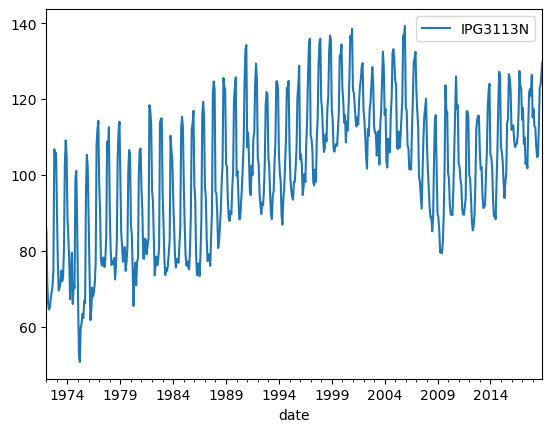

In [27]:
# Importing the dataset
candy = pd.read_csv(data/'candy_production.csv', index_col='date', parse_dates=True)
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

As we can see from the graph the timeseries is not stationary as it exhibits as upward trend increasing over the years

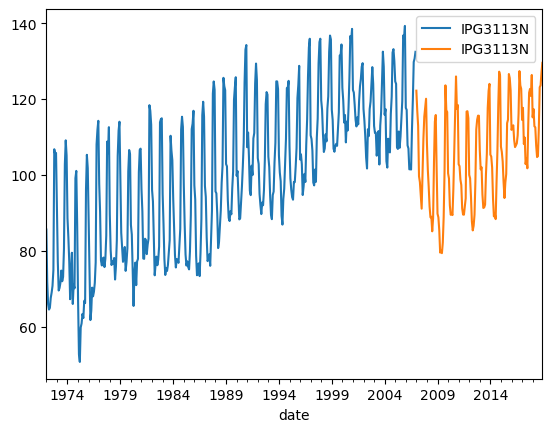

In [28]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006-12-31']
candy_test = candy.loc['2007-01-01':]

# Create an axis
fig, ax = plt.subplots()
# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Augmented Dickey-Fuller test

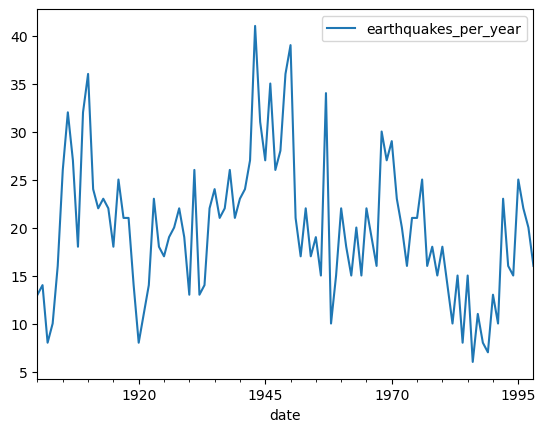

In [29]:
# importing data
earthqaukes = pd.read_csv(data/'earthquakes.csv', index_col='date', parse_dates=True).drop('Year', axis=1)
# Plot the time serie
earthqaukes.plot()
plt.show()

In [45]:
results = adfuller(earthqaukes['earthquakes_per_year'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is greater than 0.05, so the data is not stationary')

ADF Statistic: -3.183192
p-value: 0.020978
Critical Values:
1%: -3.500
5%: -2.892
10%: -2.583


The p-value is greater than 0.05, so the data is not stationary


ADF Statistic: -7.203579
p-value: 0.000000
Critical Values:
1%: -3.436
5%: -2.864
10%: -2.568


The p-value is less than 0.05, so the data is stationary


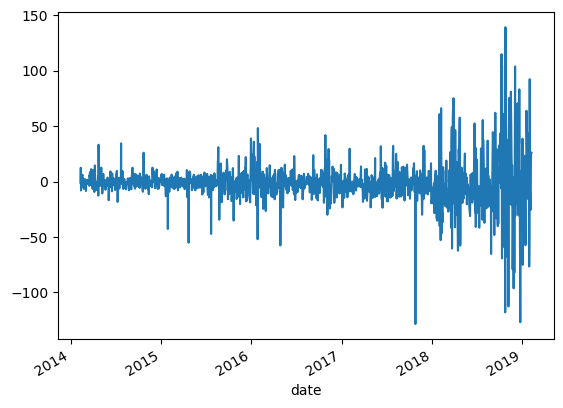

In [56]:
# Another example 
amazon = pd.read_csv(data/'amazon_close.csv', index_col='date', parse_dates=True)

# Adfuller test after first difference
results = adfuller(amazon['close'].diff().dropna())
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is less than 0.05, so the data is stationary')

# Plot the time series
amazon['close'].diff().dropna().plot()
plt.show()

ADF Statistic: -0.773978
p-value: 0.826647
Critical Values:
1%: -3.436
5%: -2.864
10%: -2.568


The p-value is less than 0.05, so the data is stationary


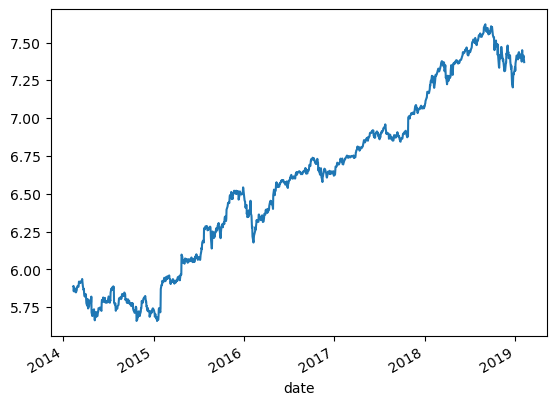

In [58]:
#Adfuller test after log transformation
results = adfuller(np.log(amazon['close']))
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('%s: %.3f' % (key, value))

print('\n')
print('The p-value is less than 0.05, so the data is stationary')

# Plot the time series
np.log(amazon['close']).plot()
plt.show()